# Final Project: Flight Delays
## by Annika Jungmann

## Investigation Overview

> The aim of this presentation is to give investors an idea of how the flight industry has been doing and which companys are doing a good job towards their customers and might therefore be worth investing in.

## Dataset Overview

> The dataset used is the Airline On Time Data from the Data Expo 2009, which consists of commercial flights within the US from 1987 up until 2008. Originally, the data is from RITA, where it should also be downloadable. Due to memory issues, not a whole year of data could be loaded. To allow for some comparisons, data for January 2018 and January 2019 are selected.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import io
import glob

%matplotlib inline

plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Paired.colors)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# Get data file names

path =r'C:\Users\Annika\Documents\Udacity\flights'

filenames = glob.glob(path + "\*.csv")

dfs = []

for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

flights = df.copy()

# Lowercase column names for simplicity
flights.columns = map(str.lower, flights.columns)

# Drop unneeded columns
flights.drop(['unnamed: 22'], axis = 1, inplace = True)

# Create new delayed columns (as per definition, a delay is considered as 15 minutes or later)
flights['delayed'] = flights['arr_delay'] >= 15

# Create new delayed columns (as per definition, a delay is considered as 15 minutes or later)
flights['early'] = flights['arr_delay'] < 0
# Convert date types
flights.fl_date = pd.to_datetime(flights.fl_date)
flights.crs_dep_time = flights.crs_dep_time.astype(str)

flights['year'] = pd.DatetimeIndex(flights['fl_date']).year
flights['day_of_week'] = pd.DatetimeIndex(flights['fl_date']).dayofweek

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Operating Carriers Ranking

> There is a large dispersion when it comes to operating carriers. Carrier WN has the largest share of flights by far, with four carriers following closely.

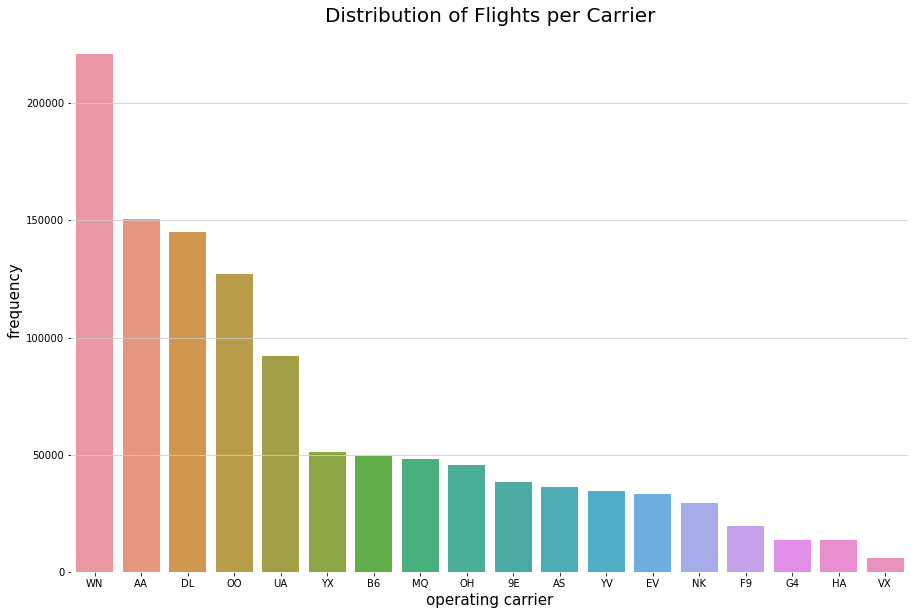

In [3]:
cat_order = flights.op_unique_carrier.value_counts().index
plt.figure(figsize = (15, 10))
sb.countplot(data = flights, x = 'op_unique_carrier', order = cat_order)
plt.xlabel('operating carrier')
plt.ylabel('frequency')
plt.title('Distribution of Flights per Carrier')

plt.show()

## Cancellations of Flights

> Looking at carriers who mostly cancel their flights, one can again see WM at the top of the list. Interestingly, DL appeared as the top 3 operating airline, while they don't appear to be cancelling many flights.

Text(0.5, 1.0, 'Cancellations of Flights per Carrier')

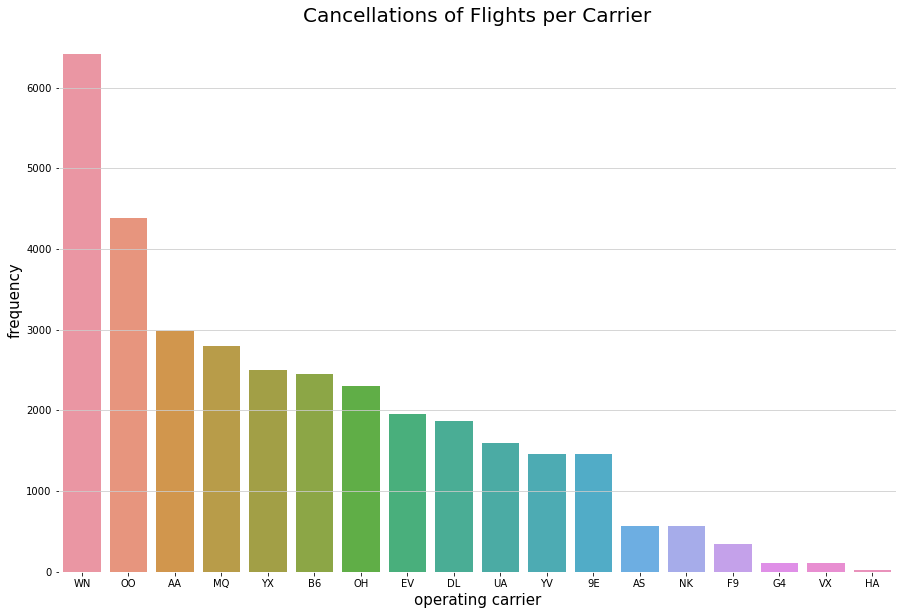

In [4]:
cancelled_flights = flights[flights.cancelled == 1]
cancelling_ops = cancelled_flights.op_unique_carrier.value_counts()

plt.figure(figsize = (15, 10))
g = sb.countplot(data = cancelled_flights, x = 'op_unique_carrier', order = cancelling_ops.index)
plt.xlabel('operating carrier')
plt.ylabel('frequency')
plt.title('Cancellations of Flights per Carrier')

## Correlations

> The relationship for arrival and departure delay is also seen when looking at the unique carriers.

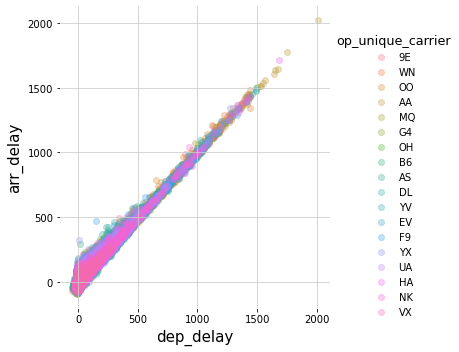

In [5]:
sb.lmplot(data = flights, x = 'dep_delay', y = 'arr_delay', hue = 'op_unique_carrier',
          fit_reg = False, scatter_kws = {'alpha': 0.3})

## Delays per Operator

>What can be seen here is how the delayed flights vary depending on the operator. Especially relatively seen, carrier DL seems to have a low proportion of delayed flights.

> As previously identified, though, the number of flights not delayed always exceeds those delayed.

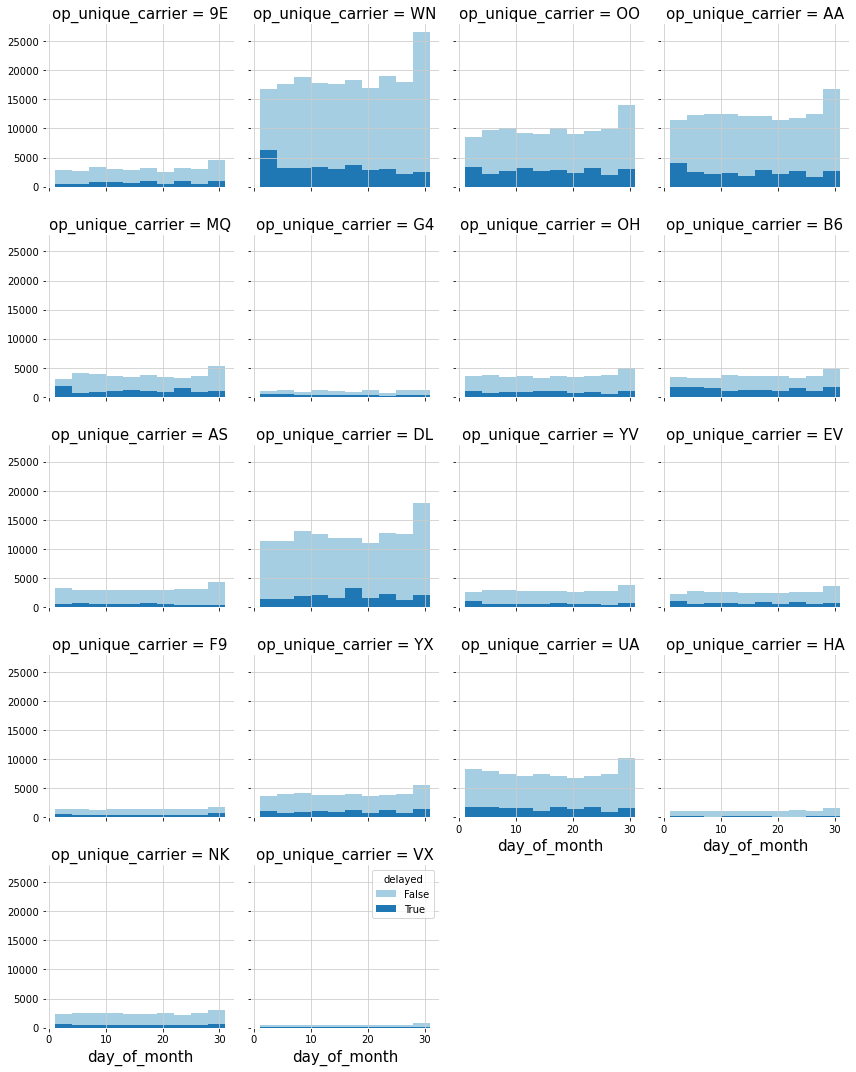

In [6]:
g = sb.FacetGrid(data = flights, col = 'op_unique_carrier', col_wrap = 4, hue = 'delayed')
g.map(plt.hist, 'day_of_month')
plt.legend(title = 'delayed')

## Early Flights per Operator

> The facetted plot highlights a few interesting points. While the dark blue histograms reflect flights arriving early, the light blue reflect flights not arriving early. It seems like the majority of operators, throughout January, always had flights arriving early. In fact, this sheds light onto operators WN, MQ, OH, B6 and YV who stand out by having flights that did not arrive early.

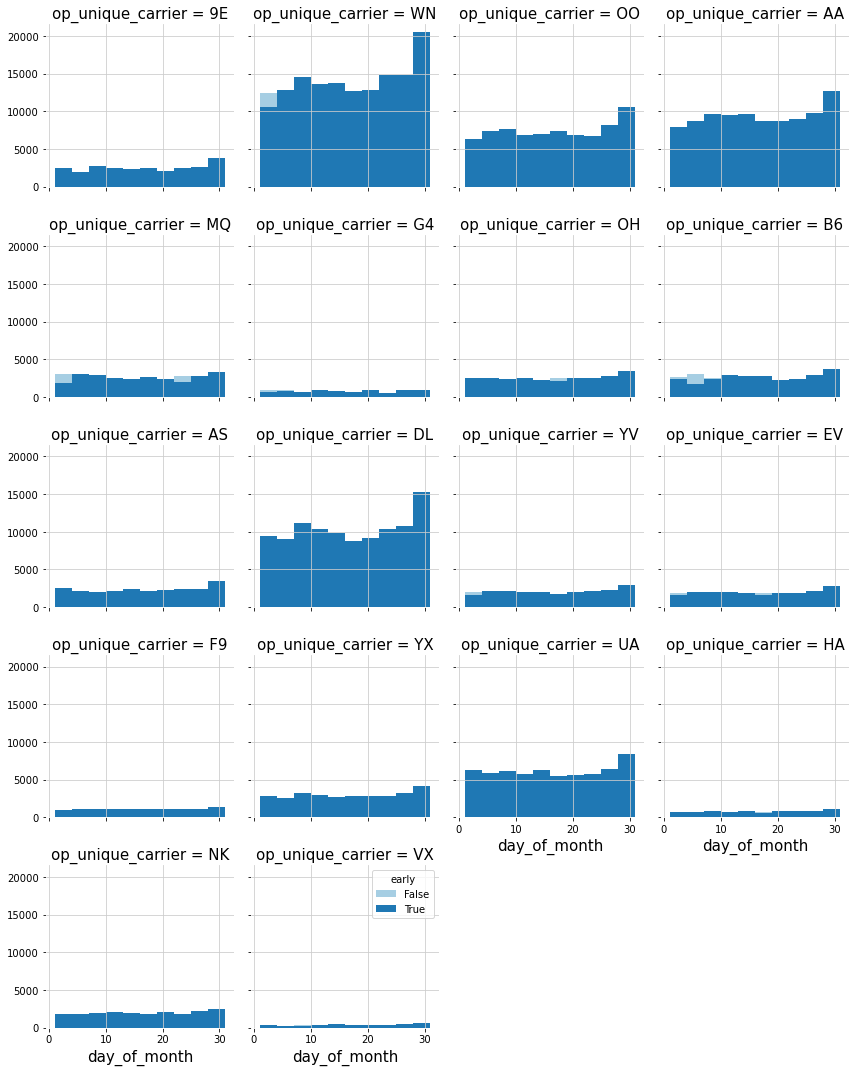

In [7]:
g = sb.FacetGrid(data = flights, col = 'op_unique_carrier', col_wrap = 4, hue = 'early')
g.map(plt.hist, 'day_of_month')
plt.legend(title = 'early')

In [8]:
!jupyter nbconvert explanatory_slides_flights.ipynb --to slides --reveal-prefix "https://cdn.jsdelivr.net/npm/reveal.js@3.6.0 " --template output_toggle.tpl

[NbConvertApp] Converting notebook explanatory_slides_flights.ipynb to slides
[NbConvertApp] Writing 494453 bytes to explanatory_slides_flights.slides.html
